## Материалы к проекту (файлы):
train.csv
test.csv

## Задание:
Используя данные из train.csv, построить
модель для предсказания цен на недвижимость (квартиры).
С помощью полученной модели предсказать
цены для квартир из файла test.csv.

### Целевая переменная:
Price

### Метрика:
R2 - коэффициент детерминации (sklearn.metrics.r2_score)


Импортируем библиотеки и считываем тренировочный набор данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
train = pd.read_csv("train.csv")
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


### Анализ и предобработка данных
#### Анализ
Проанализируем набор данных

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [4]:
train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


Поскольку Id не несет практически полезной информации, то исключаем. А DistrictId преобразуем к строковому типу данных, так как это категориальный признак, а не численный.
Разделим данные на обучающие и валидационные. 
А так-же отделяем от валидационных данных целевой показатель "price" (для обучающих данных проведем это после обработки).

In [5]:
train['DistrictId'] = train['DistrictId'].astype(str)
train, valid = train_test_split(train, test_size=0.2, random_state=42)
X_valid, y_valid = valid.iloc[:,1:-1], valid.iloc[:,-1]
train = train.iloc[:,1:]
train

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9254,58,1.0,65.271225,62.798045,1.0,3,1.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,210849.693542
1561,146,2.0,45.091598,43.816601,1.0,5,18.0,2017,0.236108,B,B,16,3893,27,NaN,3,10,B,201549.998077
1670,5,1.0,34.463114,20.561823,5.0,3,5.0,1960,0.150818,B,B,16,3433,4,2643.0,4,5,B,158433.168775
6087,90,3.0,61.931107,46.126389,5.0,4,5.0,1966,0.265089,B,B,37,5288,0,1937.0,3,2,B,220194.818430
6669,1,1.0,42.670840,NaN,1.0,8,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,125834.270291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,30,2.0,62.219340,62.405338,1.0,4,2.0,2015,0.000078,B,B,22,6398,141,1046.0,3,23,B,150136.610509
5191,25,3.0,85.790813,NaN,1.0,9,25.0,2018,0.069753,B,B,53,13670,4,NaN,1,11,B,328680.869407
5390,1,3.0,83.225854,NaN,1.0,13,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,255102.406709
860,94,3.0,51.354934,36.538453,5.0,1,9.0,1973,0.127376,B,B,43,8429,3,NaN,3,9,B,182236.048759


Построим матрицу корреляции

<AxesSubplot:>

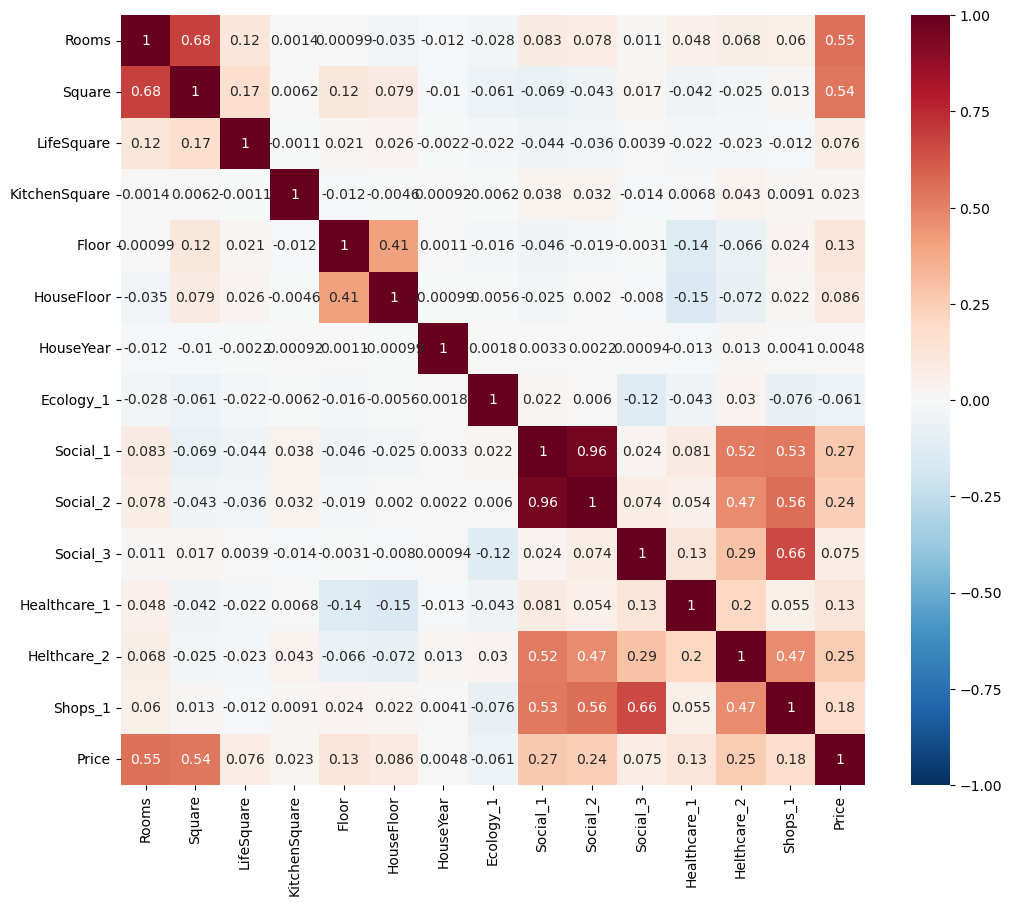

In [6]:
plt.figure(figsize=(12,10))
sns.heatmap(train.corr(), cmap='RdBu_r', annot=True, vmin=-1, vmax=1)

Видим высокую корреляцию между признаками Social_1 и Social_2, в дальнейшем возможно избавимся от одного из этих признаков.
Имеем среднюю корреляцию  между признаками Rooms и Square, а также признаков Helthcare_2 и Shops_1 с признаками Social_1, Social_2 и Social_3 и между собой. В последствии сравним эту матрицу корреляции с аналогичной после предобработки данных.

### Предобработка данных
Проведём предварительную обработку данных, а именно обработку пропусков и выбросов.

##### DistrictId
Номер района является категориальным признаком без пропусков. Просмотрим статистику

In [7]:
train['DistrictId'].value_counts().head()

27    671
1     534
23    452
6     407
9     243
Name: DistrictId, dtype: int64

In [8]:
len(train['DistrictId'].value_counts())

203

##### Rooms
Рассмотрим данные о количестве комнат

In [9]:
train["Rooms"].value_counts()

2.0     3111
1.0     2966
3.0     1784
4.0      117
5.0       14
0.0        5
19.0       1
6.0        1
10.0       1
Name: Rooms, dtype: int64

In [10]:
train.loc[~train["Rooms"].isin(range(1, 7))]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1454,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,B,B,1,264,0,NaN,0,1,B,78364.616704
4366,6,0.0,81.491446,NaN,0.0,4,0.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,212864.799112
1397,27,0.0,138.427694,136.215499,0.0,4,3.0,2016,0.075424,B,B,11,3097,0,NaN,0,0,B,268394.744389
2269,27,0.0,41.790881,NaN,0.0,13,0.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,98129.976788
377,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,NaN,5,15,B,317265.323792
3911,28,0.0,49.483501,NaN,0.0,16,0.0,2015,0.118537,B,B,30,6207,1,1183.0,1,0,B,217009.338463
4853,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B,126596.941798


Как мы видим - количество комнат меньше 1 и больше 6 это ошибка ввода. Так же видим 1 объект с 0 комнат, общей площадью 2.37 кв.м., который явно не может являться квартирой - исключим его, у остальных заменим выбросы в столбце Rooms медианой

In [11]:
train.drop(4853)
rooms_median = train["Rooms"].median()
train.loc[~train["Rooms"].isin(range(1, 7)), "Rooms"] = rooms_median

In [12]:
train["Rooms"].value_counts()

2.0    3118
1.0    2966
3.0    1784
4.0     117
5.0      14
6.0       1
Name: Rooms, dtype: int64

##### Square 	LifeSquare 	KitchenSquare
Рассмотрим данные о площадях

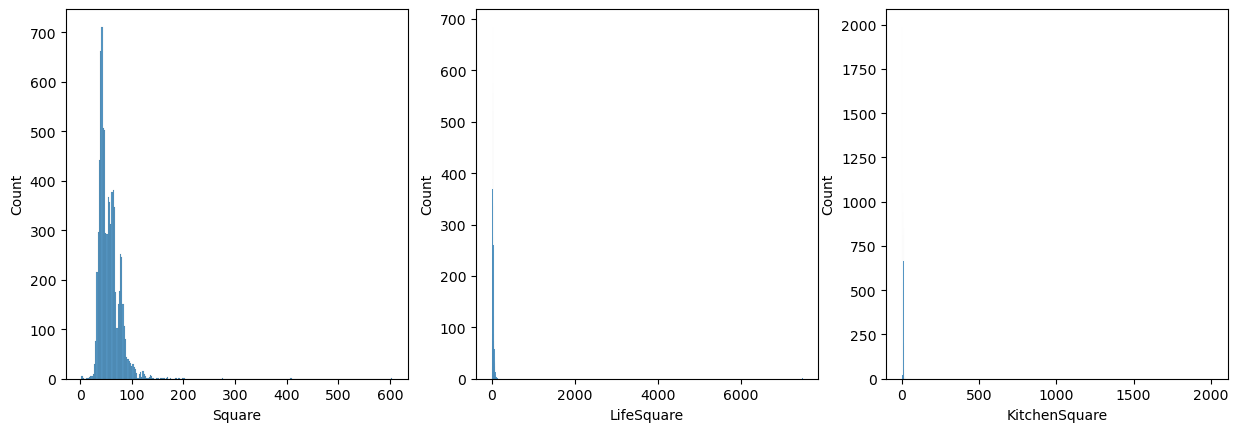

In [13]:
fig, ax = plt.subplots(1, 3)
sns.histplot(train["Square"], ax=ax[0])
sns.histplot(train["LifeSquare"], ax=ax[1])
sns.histplot(train["KitchenSquare"], ax=ax[2])
fig.set_figwidth(15)

Ограничим значения площади интервалом от 15 до 100 кв.м.

In [14]:
train = train[(train["Square"] < 100) & (train["Square"] > 15)]
train

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9254,58,1.0,65.271225,62.798045,1.0,3,1.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,210849.693542
1561,146,2.0,45.091598,43.816601,1.0,5,18.0,2017,0.236108,B,B,16,3893,27,NaN,3,10,B,201549.998077
1670,5,1.0,34.463114,20.561823,5.0,3,5.0,1960,0.150818,B,B,16,3433,4,2643.0,4,5,B,158433.168775
6087,90,3.0,61.931107,46.126389,5.0,4,5.0,1966,0.265089,B,B,37,5288,0,1937.0,3,2,B,220194.818430
6669,1,1.0,42.670840,NaN,1.0,8,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,125834.270291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,30,2.0,62.219340,62.405338,1.0,4,2.0,2015,0.000078,B,B,22,6398,141,1046.0,3,23,B,150136.610509
5191,25,3.0,85.790813,NaN,1.0,9,25.0,2018,0.069753,B,B,53,13670,4,NaN,1,11,B,328680.869407
5390,1,3.0,83.225854,NaN,1.0,13,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,255102.406709
860,94,3.0,51.354934,36.538453,5.0,1,9.0,1973,0.127376,B,B,43,8429,3,NaN,3,9,B,182236.048759


Потеряно 2,5% данных

In [15]:
train["KitchenSquare"].value_counts()

1.0       1921
8.0       1047
5.0        941
10.0       830
6.0        812
9.0        659
0.0        523
7.0        494
12.0       189
11.0       175
13.0        52
4.0         30
14.0        28
3.0         18
15.0        17
16.0        12
20.0         6
17.0         6
19.0         4
2.0          3
22.0         3
37.0         2
51.0         2
58.0         2
73.0         1
35.0         1
39.0         1
84.0         1
18.0         1
54.0         1
62.0         1
63.0         1
78.0         1
1970.0       1
2014.0       1
96.0         1
43.0         1
25.0         1
72.0         1
48.0         1
53.0         1
40.0         1
41.0         1
Name: KitchenSquare, dtype: int64

Площадь кухни, больше 16 или меньше 4 кв.м. считаем выбросом и заменяем медианой

In [16]:
KitchenSquare_median = train["KitchenSquare"].median()
train.loc[(train["KitchenSquare"] < 4) | (train["KitchenSquare"] > 16), "KitchenSquare"] = KitchenSquare_median

Наложим на значения жилой площади ограничения в зависимости от значений общей площади и площади кухни

In [17]:
train["LifeSquare"] = train["LifeSquare"].fillna((train["Square"] - train["KitchenSquare"])* 0.9)
train["LifeSquare"].loc[train["LifeSquare"] > train["Square"]- train["KitchenSquare"]] = (train["Square"] - train["KitchenSquare"])* 0.9
train["LifeSquare"].loc[train["LifeSquare"] < train["Square"] * 0.5] = (train["Square"] - train["KitchenSquare"])* 0.9

C:\Users\ПК\AppData\Local\Temp\ipykernel_14156\753272847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["LifeSquare"] = train["LifeSquare"].fillna((train["Square"] - train["KitchenSquare"])* 0.9)
C:\Users\ПК\AppData\Local\Temp\ipykernel_14156\753272847.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["LifeSquare"].loc[train["LifeSquare"] > train["Square"]- train["KitchenSquare"]] = (train["Square"] - train["KitchenSquare"])* 0.9
C:\Users\ПК\AppData\Local\Temp\ipykernel_14156\753272847.py:3: SettingWithCopyWarning: 
A value is trying to be set 

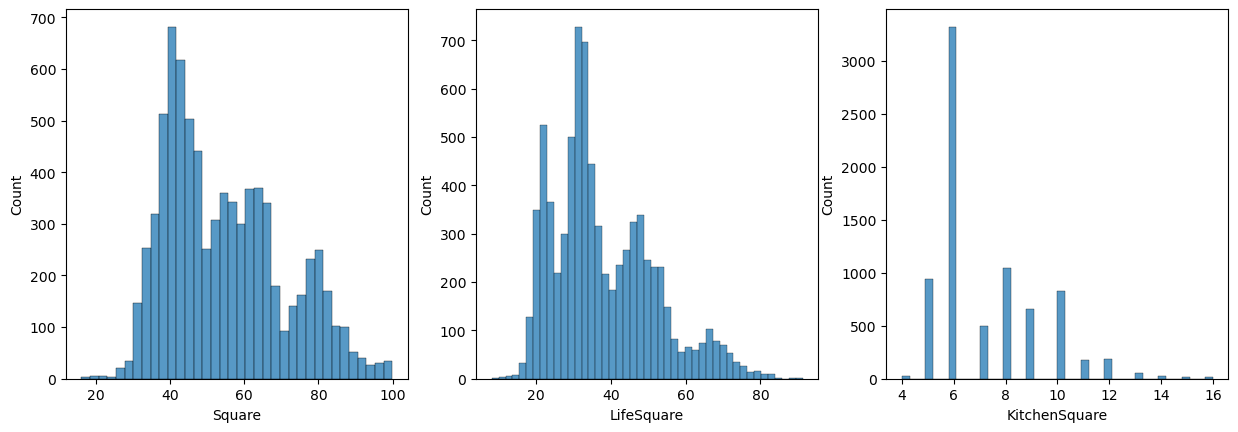

In [18]:
fig, ax = plt.subplots(1, 3)
sns.histplot(train["Square"], ax=ax[0])
sns.histplot(train["LifeSquare"], ax=ax[1])
sns.histplot(train["KitchenSquare"], ax=ax[2])
fig.set_figwidth(15)

##### Floor HouseFloor
Рассмотрим данные о этажах

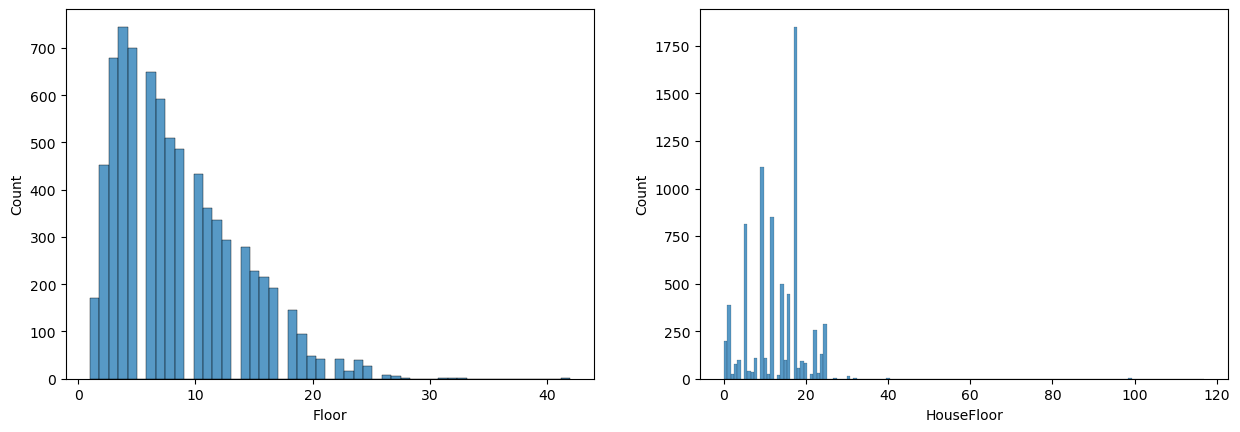

In [19]:
fig, ax = plt.subplots(1, 2)
sns.histplot(train["Floor"], ax=ax[0])
sns.histplot(train["HouseFloor"], ax=ax[1])
fig.set_figwidth(15)

В первую очередь исправим случаи, когда в доме меньше этажей чем этаж расположения квартиры

In [20]:
train.loc[train["HouseFloor"] < train["Floor"], "HouseFloor"] = train["Floor"]

Так же будем считать все дома выше 30 этажей как 30-этажные, а квартиры выше 30 этажа как квартиры на 30 этаже.

In [21]:
train.loc[train["HouseFloor"] > 30, "HouseFloor"] = 30
train.loc[train["Floor"] > 30, "Floor"] = 30

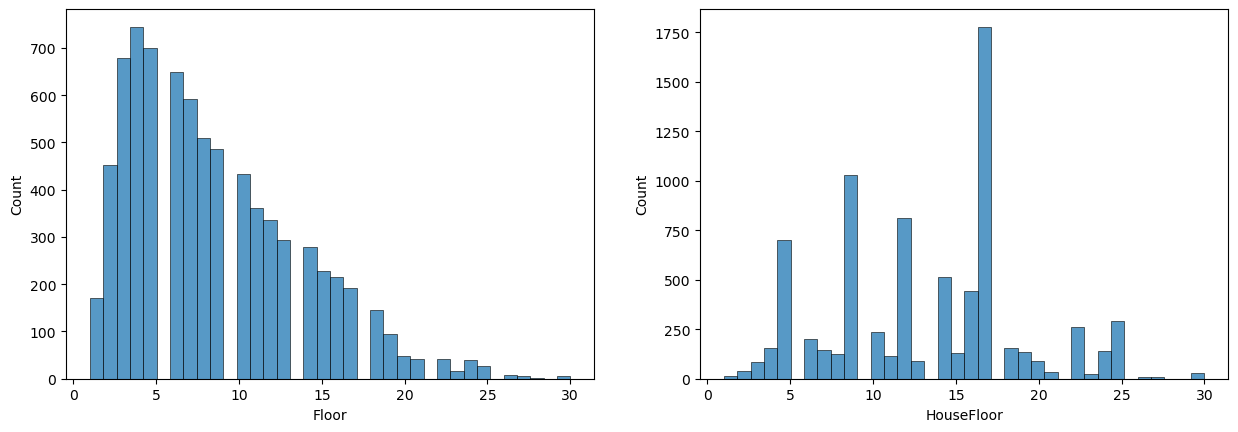

In [22]:
fig, ax = plt.subplots(1, 2)
sns.histplot(train["Floor"], ax=ax[0])
sns.histplot(train["HouseFloor"], ax=ax[1])
fig.set_figwidth(15)

##### HouseYear
В первую очередь год выше 2022 заменяем на 2022.

In [23]:
train.loc[train["HouseYear"] > 2022]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
4189,147,2.0,44.791836,28.360393,5.0,4,9.0,4968,0.319809,B,B,25,4756,16,2857.0,5,8,B,243028.603096
1497,109,1.0,37.265070,20.239714,9.0,9,12.0,20052011,0.136330,B,B,30,6141,10,262.0,3,6,B,254084.534396


In [24]:
train.loc[train["HouseYear"] > 2022, "HouseYear"] = 2022

После чего заменяем значения года меньше 1900 на 1900

In [25]:
train.loc[train["HouseYear"] < 1900, "HouseYear"] = 1900

<AxesSubplot:xlabel='HouseYear', ylabel='Count'>

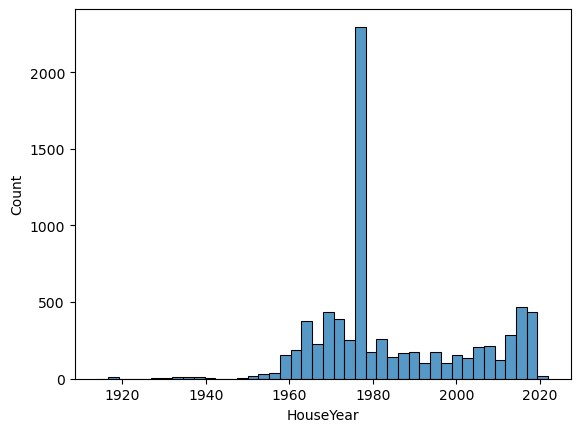

In [26]:
sns.histplot(train["HouseYear"])

##### Ecology_1 Ecology_2 Ecology_3
Проанализируем данные по экологии

<AxesSubplot:xlabel='Ecology_2', ylabel='Ecology_1'>

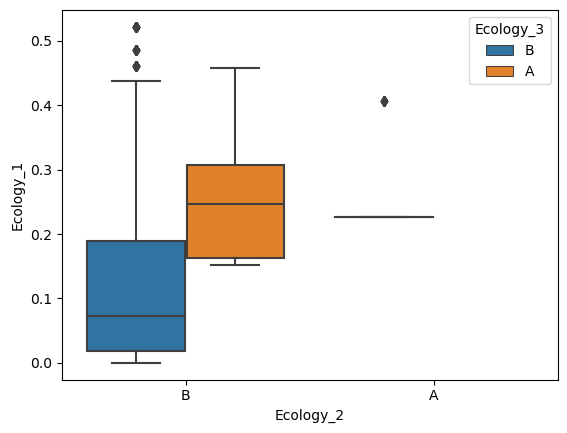

In [27]:
sns.boxplot(data=train, x="Ecology_2", y="Ecology_1", hue="Ecology_3")

Как мы можем видеть - для показателей Ecology_2 Ecology_3 значение медианы Ecology_1 близко для значений (А, В) и (В, А) и превосходит значение медианы Ecology_1 для сочетания (В, В). Данные для сочетания (А, А) отсутствуют, но можно судить что этому сочетанию соответствовало бы наиболее высокое значение медианы Ecology_1.

In [28]:
train[["Ecology_2", "Ecology_3"]].value_counts()

Ecology_2  Ecology_3
B          B            7499
           A             221
A          B              75
dtype: int64

Учитывая, что сочетаний, отличных от (В,В) не более 6%, а так же ввиду видимой из графика выше взаимосвязи категориальных параметров Ecology_2 и Ecology_3 с Ecology_1, можно сделать вывод о незначительности Ecology_2 и Ecology_3 в сравнении с Ecology_1 и исключить их из рассмотрения.

C:\Users\ПК\AppData\Local\Temp\ipykernel_14156\202931230.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(["Ecology_2", "Ecology_3"], axis=1, inplace=True)


<AxesSubplot:xlabel='Ecology_1', ylabel='Count'>

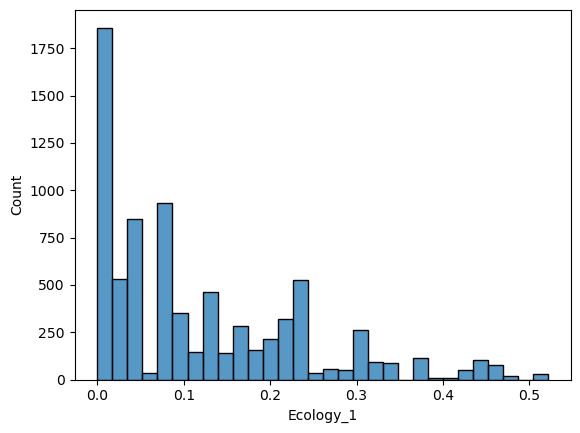

In [29]:
train.drop(["Ecology_2", "Ecology_3"], axis=1, inplace=True)
sns.histplot(train["Ecology_1"])

##### Social_1 Social_2 Social_3


Проанализируем данные социальной инфраструктуры

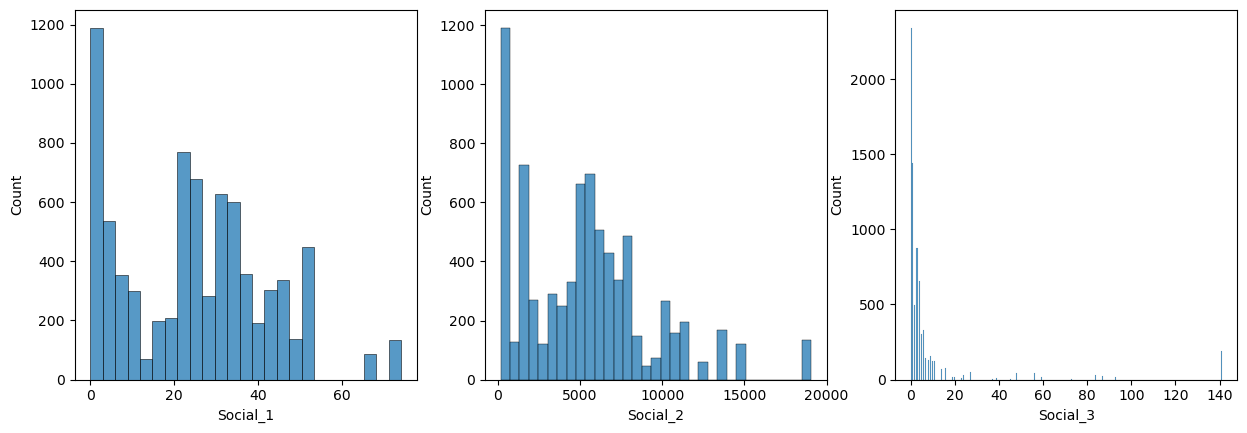

In [30]:
fig, ax = plt.subplots(1, 3)
sns.histplot(train["Social_1"], ax=ax[0])
sns.histplot(train["Social_2"], ax=ax[1])
sns.histplot(train["Social_3"], ax=ax[2])
fig.set_figwidth(15)

In [31]:
train["Social_3"].value_counts()

0      2342
1      1441
3       875
4       657
2       499
6       329
5       305
141     187
9       154
7       146
8       133
11      125
10      121
16       78
14       72
27       48
48       45
56       41
84       33
24       30
87       22
93       20
19       20
20       17
59       16
39       12
23       12
45        7
73        5
37        3
Name: Social_3, dtype: int64

 Наблюдается высокое значение Social_3 (141), которое встречается достаточно часто (187 раз). Но тем не менее оснований считать его выбросом или ошибкой ввода нет. В остальных двух величинах явных выбросов и аномалий так же не замечено (всплески в районе максимальных величин будем считать характерными для "центра" с высокой плотностью расположения обьектов социальной инфраструктуры)

##### Healthcare_1 Helthcare_2

Проанализируем данные инфраструктуры охраны здоровья

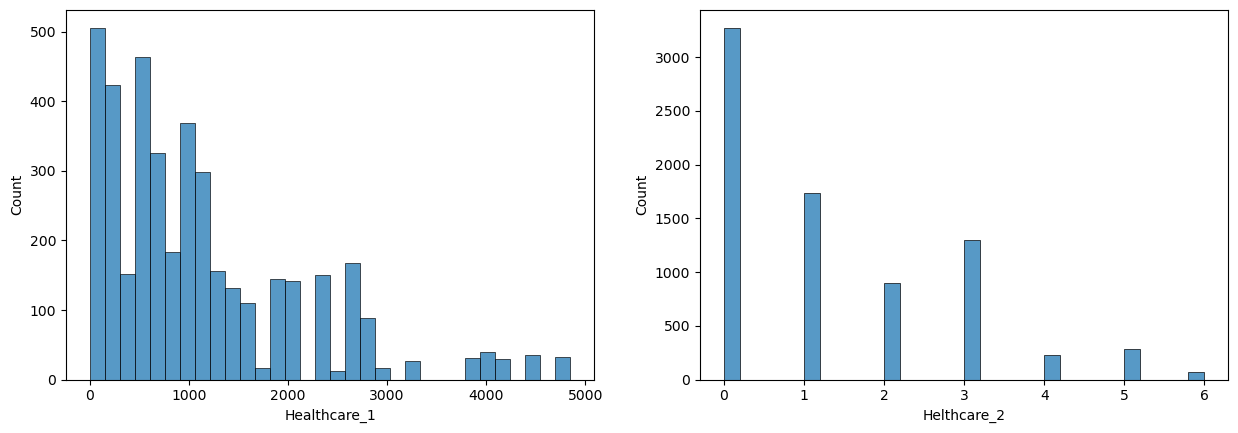

In [32]:
fig, ax = plt.subplots(1, 2)
sns.histplot(train["Healthcare_1"], ax=ax[0])
sns.histplot(train["Helthcare_2"], ax=ax[1])
fig.set_figwidth(15)

Как было показано в начале анализа обучающих данных - Healthcare_1 имеет большое число пропусков, которые мы заменим на -1 и добавим категориальный признак Healthcare_1_NaN

In [33]:
train["Healthcare_1_NaN"] = train["Healthcare_1"].isna().astype(int)
train["Healthcare_1"] = train["Healthcare_1"].fillna(int(-1))
train

C:\Users\ПК\AppData\Local\Temp\ipykernel_14156\1376674063.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Healthcare_1_NaN"] = train["Healthcare_1"].isna().astype(int)
C:\Users\ПК\AppData\Local\Temp\ipykernel_14156\1376674063.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Healthcare_1"] = train["Healthcare_1"].fillna(int(-1))


,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Healthcare_1_NaN
9254,58,1.0,65.271225,53.344103,6.0,3,3.0,1977,0.437885,23,5735,3,1084.0,0,5,B,210849.693542,0
1561,146,2.0,45.091598,35.182439,6.0,5,18.0,2017,0.236108,16,3893,27,-1.0,3,10,B,201549.998077,1
1670,5,1.0,34.463114,20.561823,5.0,3,5.0,1960,0.150818,16,3433,4,2643.0,4,5,B,158433.168775,0
6087,90,3.0,61.931107,46.126389,5.0,4,5.0,1966,0.265089,37,5288,0,1937.0,3,2,B,220194.818430,0
6669,1,1.0,42.670840,33.003756,6.0,8,17.0,1977,0.007122,1,264,0,-1.0,0,1,B,125834.270291,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,30,2.0,62.219340,50.597406,6.0,4,4.0,2015,0.000078,22,6398,141,1046.0,3,23,B,150136.610509,0
5191,25,3.0,85.790813,71.811732,6.0,9,25.0,2018,0.069753,53,13670,4,-1.0,1,11,B,328680.869407,1
5390,1,3.0,83.225854,69.503268,6.0,13,17.0,1977,0.007122,1,264,0,-1.0,0,1,B,255102.406709,1
860,94,3.0,51.354934,36.538453,5.0,1,9.0,1973,0.127376,43,8429,3,-1.0,3,9,B,182236.048759,1


##### Shops_1 Shops_2

In [34]:
train["Shops_2"].value_counts()

B    7156
A     639
Name: Shops_2, dtype: int64

<AxesSubplot:xlabel='Shops_1', ylabel='Count'>

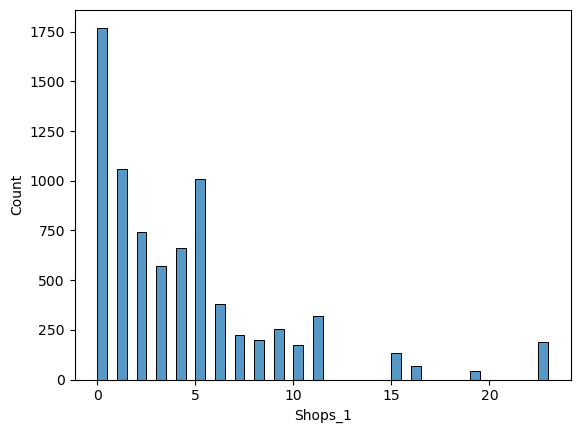

In [35]:
sns.histplot(train["Shops_1"])

Заменим значения А и В в Shops_2 на 1 и 0 соответственно

In [36]:
train["Shops_2"] = (train["Shops_2"] == 'A').astype(int)

C:\Users\ПК\AppData\Local\Temp\ipykernel_14156\1184894341.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Shops_2"] = (train["Shops_2"] == 'A').astype(int)


##### Price
Целевое значение

<AxesSubplot:xlabel='Price', ylabel='Count'>

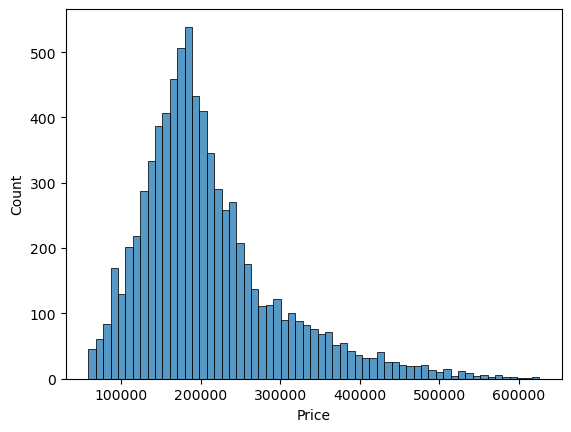

In [37]:
sns.histplot(train["Price"])

Построим матрицу корреляции после обработки данных

<AxesSubplot:>

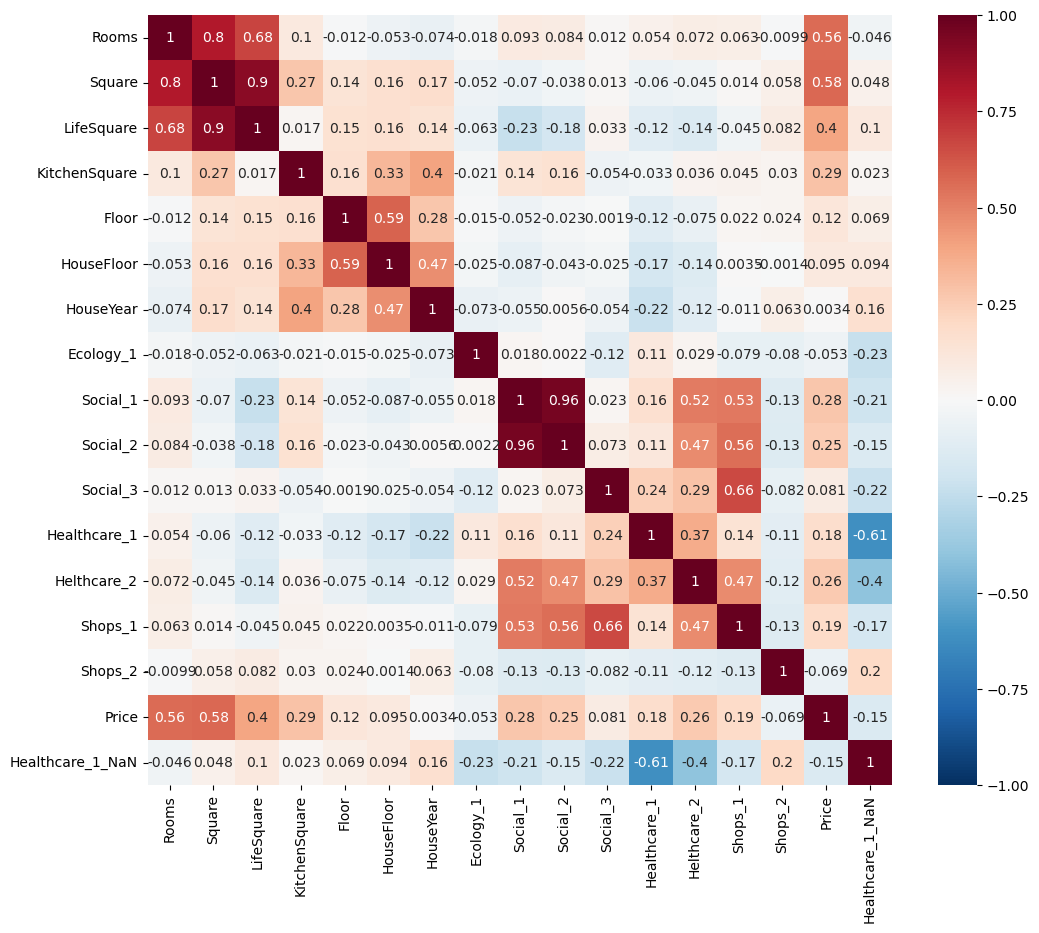

In [38]:
plt.figure(figsize=(12,10))
sns.heatmap(train.corr(), cmap='RdBu_r', annot=True, vmin=-1, vmax=1)

In [39]:
y_train = train.iloc[:,-2]
train.drop("Price", axis=1, inplace=True)
X_train = train

C:\Users\ПК\AppData\Local\Temp\ipykernel_14156\324378111.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop("Price", axis=1, inplace=True)


In [40]:
X_train

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Healthcare_1_NaN
9254,58,1.0,65.271225,53.344103,6.0,3,3.0,1977,0.437885,23,5735,3,1084.0,0,5,0,0
1561,146,2.0,45.091598,35.182439,6.0,5,18.0,2017,0.236108,16,3893,27,-1.0,3,10,0,1
1670,5,1.0,34.463114,20.561823,5.0,3,5.0,1960,0.150818,16,3433,4,2643.0,4,5,0,0
6087,90,3.0,61.931107,46.126389,5.0,4,5.0,1966,0.265089,37,5288,0,1937.0,3,2,0,0
6669,1,1.0,42.670840,33.003756,6.0,8,17.0,1977,0.007122,1,264,0,-1.0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,30,2.0,62.219340,50.597406,6.0,4,4.0,2015,0.000078,22,6398,141,1046.0,3,23,0,0
5191,25,3.0,85.790813,71.811732,6.0,9,25.0,2018,0.069753,53,13670,4,-1.0,1,11,0,1
5390,1,3.0,83.225854,69.503268,6.0,13,17.0,1977,0.007122,1,264,0,-1.0,0,1,0,1
860,94,3.0,51.354934,36.538453,5.0,1,9.0,1973,0.127376,43,8429,3,-1.0,3,9,0,1


Предварительная обработка обучающего набора данных завершена

### Обработка валидационных данных

In [41]:
X_valid['DistrictId'] = X_valid['DistrictId'].astype(str)
X_valid["Shops_2"] = (X_valid["Shops_2"] == 'A').astype(int)
X_valid["Healthcare_1_NaN"] = X_valid["Healthcare_1"].isna().astype(int)
X_valid["Healthcare_1"] = X_valid["Healthcare_1"].fillna(int(-1))
X_valid.loc[~X_valid["Rooms"].isin(range(1, 7)), "Rooms"] = rooms_median
X_valid.loc[(X_valid["KitchenSquare"] < 4) | (X_valid["KitchenSquare"] > 16), "KitchenSquare"] = KitchenSquare_median
X_valid["LifeSquare"] = X_valid["LifeSquare"].fillna((X_valid["Square"] - X_valid["KitchenSquare"])* 0.9)
X_valid["LifeSquare"].loc[X_valid["LifeSquare"] > X_valid["Square"]- X_valid["KitchenSquare"]] = (X_valid["Square"] - X_valid["KitchenSquare"])* 0.9
X_valid["LifeSquare"].loc[X_valid["LifeSquare"] < X_valid["Square"] * 0.5] = (X_valid["Square"] - X_valid["KitchenSquare"])* 0.9
X_valid.drop(["Ecology_2", "Ecology_3"], axis=1, inplace=True)
X_valid

C:\Users\ПК\AppData\Local\Temp\ipykernel_14156\1414384380.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid["LifeSquare"].loc[X_valid["LifeSquare"] > X_valid["Square"]- X_valid["KitchenSquare"]] = (X_valid["Square"] - X_valid["KitchenSquare"])* 0.9
C:\Users\ПК\AppData\Local\Temp\ipykernel_14156\1414384380.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid["LifeSquare"].loc[X_valid["LifeSquare"] < X_valid["Square"] * 0.5] = (X_valid["Square"] - X_valid["KitchenSquare"])* 0.9


,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Healthcare_1_NaN
6252,21,2.0,48.812195,34.679779,5.0,5,5.0,1963,0.034331,25,5487,3,-1.0,0,4,0,1
4684,61,3.0,81.103039,49.310278,8.0,4,4.0,1960,0.298205,16,4048,3,-1.0,1,3,0,1
1731,6,3.0,82.882978,69.194680,6.0,8,17.0,1977,0.243205,5,1564,0,540.0,0,0,0,0
4742,23,1.0,33.863324,25.076992,6.0,5,4.0,1977,0.034656,0,168,0,-1.0,0,0,0,1
4521,52,1.0,43.095135,33.385621,6.0,10,17.0,1977,0.371149,34,7065,1,750.0,2,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6412,37,3.0,50.129172,38.043756,5.0,1,9.0,1974,0.127812,28,7287,5,320.0,1,3,0,0
8285,58,1.0,40.950493,31.455443,6.0,5,3.0,2016,0.437885,23,5735,3,1084.0,0,5,0,0
7853,21,2.0,49.693291,32.804754,5.0,5,5.0,1965,0.034331,25,5487,3,-1.0,0,4,0,1
1095,85,1.0,44.537699,23.308356,10.0,20,22.0,1987,0.037178,52,11217,1,2300.0,1,7,0,0


In [42]:
X_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 6252 to 6929
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DistrictId        2000 non-null   object 
 1   Rooms             2000 non-null   float64
 2   Square            2000 non-null   float64
 3   LifeSquare        2000 non-null   float64
 4   KitchenSquare     2000 non-null   float64
 5   Floor             2000 non-null   int64  
 6   HouseFloor        2000 non-null   float64
 7   HouseYear         2000 non-null   int64  
 8   Ecology_1         2000 non-null   float64
 9   Social_1          2000 non-null   int64  
 10  Social_2          2000 non-null   int64  
 11  Social_3          2000 non-null   int64  
 12  Healthcare_1      2000 non-null   float64
 13  Helthcare_2       2000 non-null   int64  
 14  Shops_1           2000 non-null   int64  
 15  Shops_2           2000 non-null   int32  
 16  Healthcare_1_NaN  2000 non-null   int32

Валидационные данные приведены в соответствие с обучающими

## Обучение модели
#### Выбор оптимальных параметров для модели случайного леса
Импортируем модель Регрессора случайного леса и создаем экземпляр модели

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
rfr = RandomForestRegressor()

Задаем пространство гиперпараметров для случайного поиска и выполняем поиск лучших гиперпараметров в первом приближении

In [44]:
random_search_space = {
    'n_estimators': np.arange(500, 1501, 50),
    'max_features': np.arange(4, 6),
    'max_depth': np.arange(10, 20),
}

In [45]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
#rfr_rand = RandomizedSearchCV(rfr, random_search_space, n_iter=500, n_jobs=-1, scoring='r2')
#model_random = rfr_rand.fit(X_train, y_train)

In [46]:
#model_random.best_params_

In [47]:
#model_random.best_score_

In [48]:
#model_random.best_estimator_

In [49]:
#pd.DataFrame(model_random.cv_results_)[['params', 'mean_test_score', 'rank_test_score']].sort_values('rank_test_score').head(10)

Найдены наилучшие параметры, закомментируем их поиск чтобы при повторном запуске не высчитывать снова.

In [50]:
best_params = {'n_estimators': 1150, 'max_features': 4, 'max_depth': 17}

In [51]:
rfr_best = RandomForestRegressor(max_depth=17, max_features=4, n_estimators=1150)
rfr_best.fit(X_train, y_train)
y_pred_valid = rfr_best.predict(X_valid)

Определим значение коэфициента детерминации для валидационного набора данных

In [52]:
r2_score(y_valid, y_pred_valid)

0.7115276477636208

<AxesSubplot:ylabel='Price'>

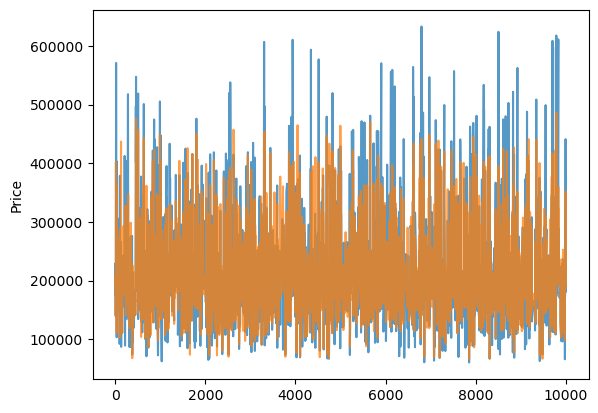

In [53]:
fig, ax = plt.subplots()
res = pd.DataFrame({'y_valid': y_valid, 'y_pred_valid': y_pred_valid})
res.reset_index
sns.lineplot(data=res, y=y_valid, x=res.index, ax=ax, alpha=0.75)
sns.lineplot(data=res, y=y_pred_valid, x=res.index, ax=ax, alpha=0.75)

## Построение предсказаний для тестового набора данных
### Подготовка тестовых данных

In [54]:
test = pd.read_csv("test.csv")
test

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8180,11,3.0,67.133911,50.809797,6.0,5,9.0,1973,0.000170,B,B,36,5992,0,NaN,1,1,B
4996,4695,1,1.0,40.198472,21.807061,10.0,12,17.0,2017,0.007122,B,B,1,264,0,NaN,0,1,B
4997,5783,12,3.0,77.842178,48.282625,9.0,23,22.0,1989,0.090799,B,B,74,19083,2,NaN,5,15,B
4998,4780,62,2.0,81.305222,NaN,0.0,4,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A


In [55]:
test['DistrictId'] = test['DistrictId'].astype(str)
test["Shops_2"] = (test["Shops_2"] == 'A').astype(int)
test["Healthcare_1_NaN"] = test["Healthcare_1"].isna().astype(int)
test["Healthcare_1"] = test["Healthcare_1"].fillna(int(-1))
test.loc[~test["Rooms"].isin(range(1, 7)), "Rooms"] = rooms_median
test.loc[(test["KitchenSquare"] < 4) | (test["KitchenSquare"] > 16), "KitchenSquare"] = KitchenSquare_median
test["LifeSquare"] = test["LifeSquare"].fillna((test["Square"] - test["KitchenSquare"])* 0.9)
test["LifeSquare"].loc[test["LifeSquare"] > test["Square"]- test["KitchenSquare"]] = (test["Square"] - test["KitchenSquare"])* 0.9
test["LifeSquare"].loc[test["LifeSquare"] < test["Square"] * 0.5] = (test["Square"] - test["KitchenSquare"])* 0.9
test.drop(["Ecology_2", "Ecology_3"], axis=1, inplace=True)
X_test, test_id = test.iloc[:,1:], test.iloc[:,0]
X_test

C:\Users\ПК\AppData\Local\Temp\ipykernel_14156\1250853097.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["LifeSquare"].loc[test["LifeSquare"] > test["Square"]- test["KitchenSquare"]] = (test["Square"] - test["KitchenSquare"])* 0.9
C:\Users\ПК\AppData\Local\Temp\ipykernel_14156\1250853097.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["LifeSquare"].loc[test["LifeSquare"] < test["Square"] * 0.5] = (test["Square"] - test["KitchenSquare"])* 0.9


,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Healthcare_1_NaN
0,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,11,2748,1,-1.0,0,0,0,1
1,74,2.0,69.263183,56.936865,6.0,6,1.0,1977,0.075779,6,1437,3,-1.0,0,2,0,1
2,190,1.0,13.597819,1.438037,12.0,2,5.0,1909,0.000000,30,7538,87,4702.0,5,5,0,0
3,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,23,4583,3,-1.0,3,3,0,1
4,27,1.0,47.527111,37.374400,6.0,17,17.0,2017,0.072158,2,629,1,-1.0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,11,3.0,67.133911,50.809797,6.0,5,9.0,1973,0.000170,36,5992,0,-1.0,1,1,0,1
4996,1,1.0,40.198472,21.807061,10.0,12,17.0,2017,0.007122,1,264,0,-1.0,0,1,0,1
4997,12,3.0,77.842178,48.282625,9.0,23,22.0,1989,0.090799,74,19083,2,-1.0,5,15,0,1
4998,62,2.0,81.305222,67.774700,6.0,4,0.0,1977,0.072158,2,629,1,-1.0,0,0,1,1


In [56]:
test_id

0         725
1       15856
2        5480
3       15664
4       14275
        ...  
4995     8180
4996     4695
4997     5783
4998     4780
4999    12504
Name: Id, Length: 5000, dtype: int64

### Построение предсказания

In [57]:
y_pred_test = rfr_best.predict(X_test)
test_result = pd.DataFrame(test_id)
test_result["Price"] = y_pred_test
test_result

,Id,Price
0,725,160884.533351
1,15856,228221.847334
2,5480,225145.284424
3,15664,331926.173563
4,14275,142444.010730
...,...,...
4995,8180,242088.698144
4996,4695,127144.268641
4997,5783,325499.556395
4998,4780,203289.954373


### Сохранение тестового предсказания

In [58]:
test_result.to_csv("predictions.csv", index=False)